# 1)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


df = pd.read_csv("/content/credit.csv")


# 2)

In [ ]:
print("Der Datensatz enthält:", len(df.index), "Zeilen.")

Der Datensatz enthält: 409 Zeilen.


In [ ]:
print("Der Datensatz entält:", len(df.columns), "Attribute")

Der Datensatz entält: 11 Attribute


In [ ]:
df.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [ ]:
df.duplicated().sum()

9

In [ ]:
df.head(13)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


# 3)

In [ ]:
df2 = df.drop_duplicates()

df2.shape

(400, 11)

# 4)

In [ ]:
print(df2.mean().apply(np.round))

Income         45.0
Limit        4736.0
Rating        355.0
Cards           3.0
Age            56.0
Education      13.0
Balance       520.0
dtype: float64


<ipython-input-260-22a6d66bf722>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df2.mean().apply(np.round))


In [1]:
df2.std().apply(np.round)

NameError: name 'df2' is not defined

In [ ]:
df2.median().apply(np.round)

<ipython-input-262-0296b601df66>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median().apply(np.round)


Income         33.0
Limit        4668.0
Rating        344.0
Cards           3.0
Age            56.0
Education      14.0
Balance       474.0
dtype: float64

[Text(0.5, 1.0, 'Überscicht der Balance Scores')]

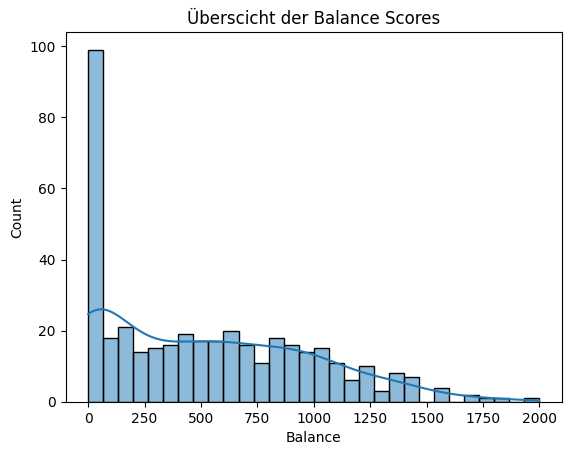

In [ ]:
sb.histplot(df2['Balance'], bins=30, kde=True).set(title='Überscicht der Balance Scores')

Es fällt auf, dass es überdurchschnittlisch viele Datensätze mit einer "Balance" von 0 gibt. Für eine bessere histographische Überscicht sollten diese nicht betrachtet werden.

In [ ]:
df3 = df2['Balance']

df3 = df3.where(df3 > 0).dropna()

df3.shape

(310,)

[Text(0.5, 1.0, 'Überscicht der Balance Scores')]

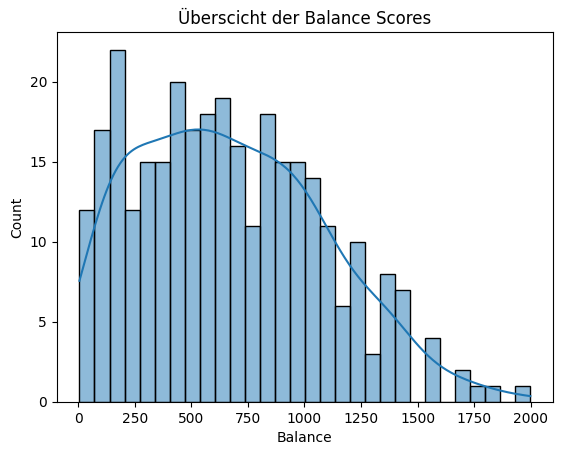

In [ ]:
sb.histplot(df3, bins=30, kde=True).set(title='Überscicht der Balance Scores')

<Axes: xlabel='Balance', ylabel='Limit'>

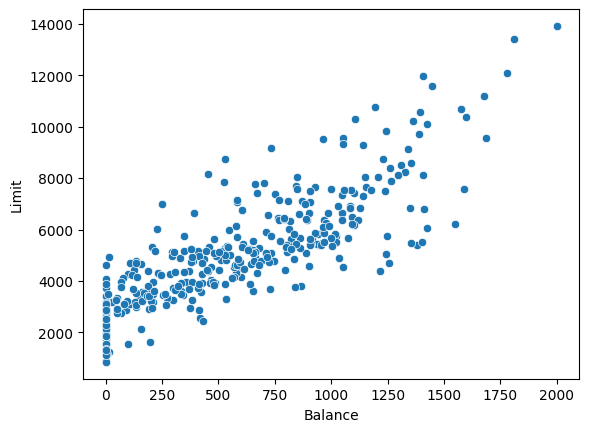

In [ ]:
sb.scatterplot(data=df2, x=df2['Balance'], y=df2['Limit'])

In [ ]:
df4 = pd.DataFrame(df['Limit']).join(df3)

df4.isnull().sum()

df4 = df4.dropna()

df4.shape

(310, 2)

[Text(0.5, 1.0, 'Bivariat Balance / Limit')]

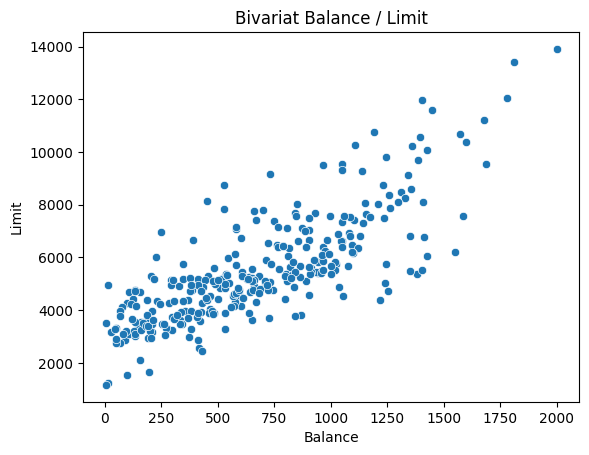

In [ ]:
sb.scatterplot(data=df4, x=df4['Balance'], y=df4['Limit']).set(title='Bivariat Balance / Limit')

Text(0, 0.5, 'Balance in [USD]')

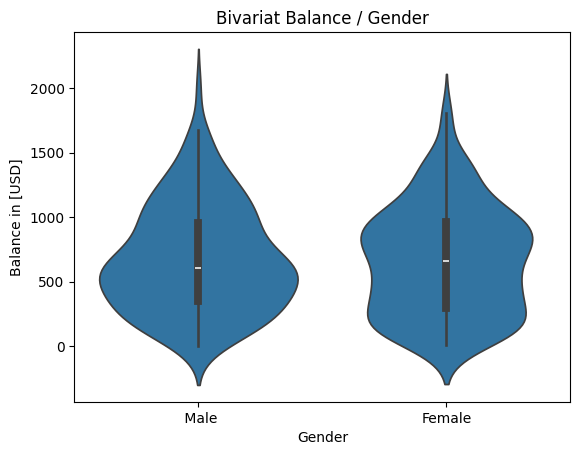

In [ ]:
df5 = pd.DataFrame(df['Gender']).join(df3)

df5.dropna()

sb.violinplot(data=df5, y=df5['Balance'], x=df5['Gender']).set(title='Bivariat Balance / Gender')

plt.xlabel("Gender")
plt.ylabel("Balance in [USD]")

Text(0, 0.5, 'Balance in [USD]')

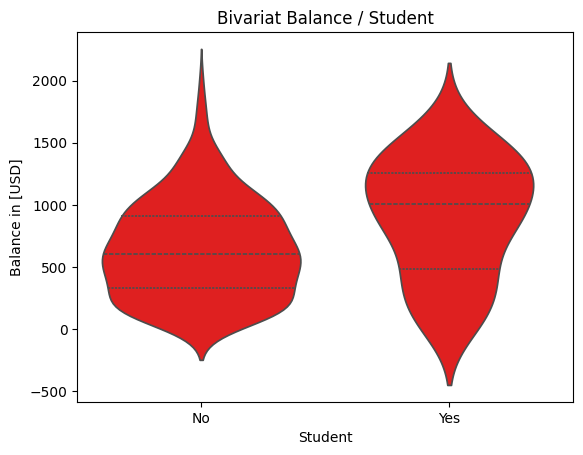

In [ ]:
df6 = pd.DataFrame(df['Student']).join(df3)

df6.dropna()

sb.violinplot(data=df6, y=df6['Balance'], x=df6['Student'], color="red", inner="quart").set(title='Bivariat Balance / Student')

plt.xlabel("Student")
plt.ylabel("Balance in [USD]")

In [ ]:
df2.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [ ]:
colname = df.columns.values
colname = colname[0:6]
colname = np.append(colname, df.columns[-1])
colname_j = df.columns.values
colname_j = colname[0:6]
colname_j = np.append(colname, df.columns[-1])

print((colname))

for column in colname:
  for column_j in colname_j:
    correlation_coefficient = df2[column].corr(df2[column_j])
    if correlation_coefficient == 1.0:
      continue
    print("Correlation Coefficient R =", correlation_coefficient)

['Income' 'Limit' 'Rating' 'Cards' 'Age' 'Education' 'Balance']
Correlation Coefficient R = 0.9999999999999998
Correlation Coefficient R = 0.7920883413369417
Correlation Coefficient R = 0.7913776251121217
Correlation Coefficient R = -0.018272609708237585
Correlation Coefficient R = 0.17533840304718862
Correlation Coefficient R = -0.02769198224337029
Correlation Coefficient R = 0.4636564570157574
Correlation Coefficient R = 0.4636564570157574
Correlation Coefficient R = 0.7920883413369417
Correlation Coefficient R = 0.996879737001683
Correlation Coefficient R = 0.010231332995559048
Correlation Coefficient R = 0.10088792156272053
Correlation Coefficient R = -0.023548534180669666
Correlation Coefficient R = 0.8616972670153953
Correlation Coefficient R = 0.8616972670153953
Correlation Coefficient R = 0.7913776251121217
Correlation Coefficient R = 0.9968797370016831
Correlation Coefficient R = 0.05323903034810493
Correlation Coefficient R = 0.10316499590280002
Correlation Coefficient R = -0

<ipython-input-347-78d86a0a0824>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df2.corr(), cmap='coolwarm',annot=True, linecolor='white',linewidths=1)


<Axes: >

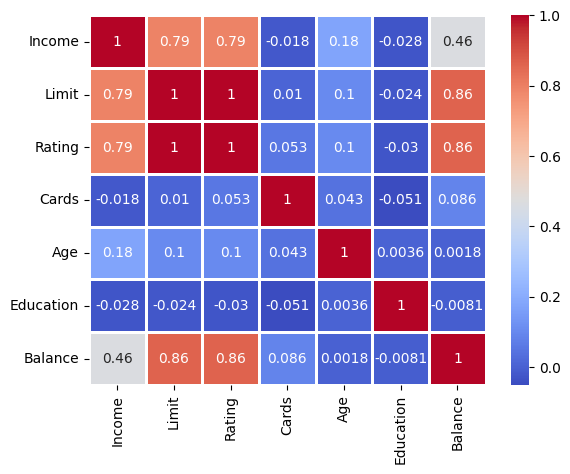

In [ ]:
# @title
sb.heatmap(df2.corr(), cmap='coolwarm',annot=True, linecolor='white',linewidths=1)

In [ ]:
!jupyter nbconvert --to markdown "A2.ipynb"

[NbConvertApp] Converting notebook A2.ipynb to markdown
[NbConvertApp] Support files will be in A2_files/
[NbConvertApp] Making directory A2_files
[NbConvertApp] Making directory A2_files
[NbConvertApp] Making directory A2_files
[NbConvertApp] Making directory A2_files
[NbConvertApp] Making directory A2_files
[NbConvertApp] Making directory A2_files
[NbConvertApp] Making directory A2_files
[NbConvertApp] Writing 18529 bytes to A2.md
